## **Assignment - EDA | IPL - Data Analysis**
# **Problem Statement**
You are tasked with conducting a comprehensive analysis of the Indian Premier League (IPL)
dataset. The analysis should cover various aspects such as the number of matches played in each season, runs scored, toss-related statistics, team performance, player statistics, and more.
# **Dataset Information**
The Indian Premier League (IPL) a professional Twenty20 cricket league in India usually
contested between March and May of every year by eight teams representing eight different
cities or states in India. The league was founded by the Board of Control for Cricket in India
(BCCI) in 2007. The IPL is the most-attended cricket league in the world and the brand value of
the IPL in 2019 was 475 billion (US$6.7 billion)


**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Exploration **

Loading the dataset

In [ ]:
# Create DataFrame, which is a structured, tabular format that's easy to analyze and manipulate
# Deliveries Dataset:
#df1 = pd.read_csv('/content/sample_data/IPL Ball-by-Ball 2008-2020.csv')
df1 = pd.read_csv('/content/drive/MyDrive/BE_Assignments/Datasets/IPL Ball-by-Ball 2008-2020.csv')
# Match Dataset:
#df2 = pd.read_csv('/content/sample_data/IPL Matches 2008-2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/BE_Assignments/Datasets/IPL Matches 2008-2020.csv')

# **Summarizing the Dataset**

In [ ]:
df1.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
df2.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# **Data Processing**

In [ ]:
# Data Processing df1
# Step 1: Handle Missing Values
# - Replace missing values in specific columns with 'None' or similar placeholders
df1['dismissal_kind'] = df1['dismissal_kind'].fillna('None')
df1['player_dismissed'] = df1['player_dismissed'].fillna('None')
df1['fielder'] = df1['fielder'].fillna('None')
df1['extras_type'] = df1['extras_type'].fillna('None')
df1['bowling_team'] = df1['bowling_team'].fillna('no_bowling_team')

# Step 2: Data Type Verification (converting columns to categorical if needed)
df1['batting_team'] = df1['batting_team'].astype('category')
df1['bowling_team'] = df1['bowling_team'].astype('category')

# Step 3: Remove Duplicates
# - Drop any duplicate rows
df1 = df1.drop_duplicates()

# Step 4: Data Consistency Check
# - Strip whitespace and ensure consistent naming in team names
df1['batting_team'] = df1['batting_team'].str.strip()
df1['bowling_team'] = df1['bowling_team'].str.strip()

# Step 5: Outlier Detection
# - Filter rows to ensure 'batsman_runs' is within a reasonable range (0 to 6)
df1 = df1[(df1['batsman_runs'] >= 0) & (df1['batsman_runs'] <= 6)]

# Display the cleaned DataFrame and summary information
print("DataFrame after preprocessing:")
df1.head()

DataFrame after preprocessing:


<ipython-input-7-2bbe574da7f9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['batting_team'] = df1['batting_team'].str.strip()
<ipython-input-7-2bbe574da7f9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bowling_team'] = df1['bowling_team'].str.strip()


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
# Data Processing df2
# Step 1: Handle Missing Values
# - Fill missing 'city' values with 'Unknown' or impute based on venue if possible
df2['city'] = df2['city'].fillna('Unknown')

# - Replace NaNs in 'method' with 'Normal' indicating no special method applied
df2['method'] = df2['method'].fillna('Normal')

# - Fill missing values in 'player_of_match', 'winner', 'result', 'result_margin', 'eliminator' with 'None' or 0 as appropriate
df2['player_of_match'] = df2['player_of_match'].fillna('None')
df2['winner'] = df2['winner'].fillna('None')
df2['result'] = df2['result'].fillna('None')
df2['result_margin'] = df2['result_margin'].fillna(0)
df2['eliminator'] = df2['eliminator'].fillna('None')

# Step 2: Encode Categorical Variables
# - Convert selected columns to categorical types
df2['team1'] = df2['team1'].astype('category')
df2['team2'] = df2['team2'].astype('category')
df2['toss_winner'] = df2['toss_winner'].astype('category')
df2['winner'] = df2['winner'].astype('category')
df2['eliminator'] = df2['eliminator'].astype('category')

# Step 3: Data Consistency Check
# - Ensure uniformity in team names by stripping extra spaces
df2['team1'] = df2['team1'].str.strip()
df2['team2'] = df2['team2'].str.strip()
df2['toss_winner'] = df2['toss_winner'].str.strip()
df2['winner'] = df2['winner'].str.strip()

# Display the cleaned DataFrame and some summary information to ensure preprocessing is successful
print("DataFrame after preprocessing:")
df2.head()

DataFrame after preprocessing:


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Normal,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,Normal,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Normal,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,Normal,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,Normal,BF Bowden,K Hariharan


**Data Analysis**

**1. What was the count of matches played in each season?**

In [ ]:
# Ensure 'date' column is in datetime format
df2['date'] = pd.to_datetime(df2['date'])

# Extract the year and get value counts
match_counts_per_season = df2['date'].dt.year.value_counts(ascending=True)

# Display the counts for each year
print(match_counts_per_season)


date
2009    57
2008    58
2015    59
2017    59
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2011    73
2012    74
2013    76
Name: count, dtype: int64


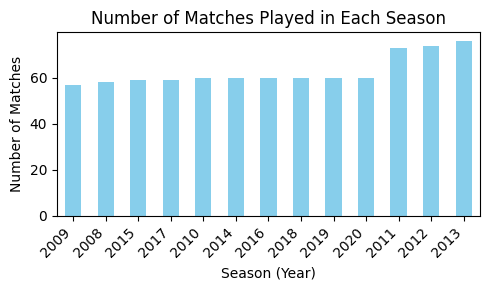

In [ ]:
# Create a bar plot
plt.figure(figsize=(5, 3))  # Adjust figure size if needed
match_counts_per_season.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played in Each Season')
plt.xlabel('Season (Year)')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


**2. How many runs were scored in each season?**

816
193467
193467
season
2008    16809
2009    15344
2010    17734
2011    19928
2012    21323
2013    21427
2014    17922
2015    17409
2016    17962
2017    17907
2018    19098
2019    18573
2020    18508
Name: batsman_runs, dtype: int64


Text(0, 0.5, 'Total Runs')

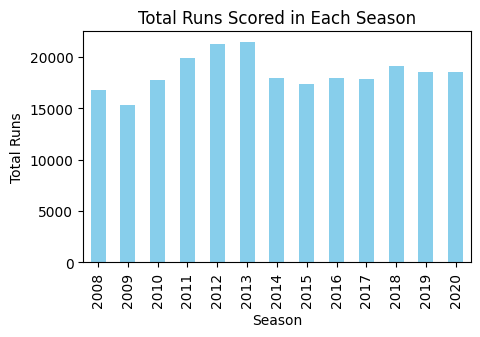

In [ ]:
# create code to calculate total runs for each season from df2
df2['season'] = pd.to_datetime(df2['date']).dt.year
print(len(df2))
print(len(df1))
# get total runs for each id in df2 that matches in df2
df3 = df2.merge(df1, left_on='id', right_on='id', how='left')
print(len(df3))
# get total runs for each season
season_runs = df3.groupby('season')['batsman_runs'].sum()
print(season_runs)
#plot bar grap
plt.figure(figsize=(5, 3))
season_runs.plot(kind='bar', color='skyblue')
plt.title('Total Runs Scored in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Runs')

# **3, What were the runs scored per match in different seasons?**

In [ ]:
#Need runs socred per match in all seasons
#from the merged data set get runs scored for each match
#get each match and sum the runs scored each team
# Ensure 'date' is consistent by merging matches dataset with ball-by-ball data
#only id and date columns are merged with df1 which is balls data set
#so now new data set has id and date combination so we can group by id and date and calculate even if more than one match is played on given day
df4 = df1.merge(df2[['id', 'date']], on='id', how='left')
df4.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,date
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,None,None,None,None,Kolkata Knight Riders,Royal Challengers Bangalore,2008-04-18


In [ ]:
# Group by 'date' and 'id', and calculate total runs for each match
total_runs_per_match_per_day = df4.groupby(['date', 'id'])['total_runs'].sum().reset_index()
print(total_runs_per_match_per_day)

          date       id  total_runs
0   2008-04-18   335982         304
1   2008-04-19   335983         447
2   2008-04-19   335984         261
3   2008-04-20   335985         331
4   2008-04-20   335986         222
..         ...      ...         ...
811 2020-11-03  1216495         300
812 2020-11-05  1237177         343
813 2020-11-06  1237178         263
814 2020-11-08  1237180         361
815 2020-11-10  1237181         313

[816 rows x 3 columns]


# **4. Who has umpired the most?**

In [ ]:
# Find out who has umpired the most from the matches dataset
#The columns umpire1 and umpire2 contain the names of the two umpires for each match.
#To find the total number of matches umpired by each person, we treat these two columns as a single list of umpire names.
#pd.concat([df_matches['umpire1'], df_matches['umpire2']]) combines these two Series into a single Series containing all umpire names.
#value_counts is a pandas Series method that counts the occurrences of each unique value in the Series
umpire_counts = pd.concat([df2['umpire1'], df2['umpire2']]).value_counts()
print(umpire_counts)

S Ravi                   121
HDPK Dharmasena           94
AK Chaudhary              87
C Shamshuddin             82
M Erasmus                 65
CK Nandan                 57
Nitin Menon               57
SJA Taufel                55
Asad Rauf                 51
VA Kulkarni               50
BNJ Oxenford              48
CB Gaffaney               47
RJ Tucker                 46
BR Doctrove               42
RE Koertzen               41
Aleem Dar                 38
BF Bowden                 37
NJ Llong                  37
KN Ananthapadmanabhan     33
RK Illingworth            31
SK Tarapore               31
RB Tiffin                 30
S Asnani                  30
AY Dandekar               28
DJ Harper                 27
AM Saheba                 26
VK Sharma                 26
A Nand Kishore            25
PR Reiffel                24
K Hariharan               21
YC Barde                  19
SS Hazare                 17
BG Jerling                17
JD Cloete                 17
K Srinath     

In [ ]:
# Result: Top umpire and their count
most_frequent_umpire = umpire_counts.idxmax()
most_frequent_umpire_count = umpire_counts.max()

print(f"Top Umpire: {most_frequent_umpire} with {most_frequent_umpire_count} matches")


Top Umpire: S Ravi with 121 matches


# **5. Which team has won the most tosses?**

In [ ]:
# Find out which team has won the most tosses
toss_winner_counts = df2['toss_winner'].value_counts()
print(toss_winner_counts)

toss_winner
Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64


In [ ]:
# Get the team with the most toss wins
most_toss_wins_team = toss_winner_counts.idxmax()
most_toss_wins_count = toss_winner_counts.max()
# Display the result
most_toss_wins_team, most_toss_wins_count

('Mumbai Indians', 106)

# **6. What does the team decide after winning the toss?**

In [ ]:
# Analyze the decision made after winning the toss
toss_decisions = df2.groupby('toss_decision')['toss_winner'].count().reset_index(name='count')
print(toss_decisions)

  toss_decision  count
0           bat    320
1         field    496


# **7. How does the toss decision vary across seasons?**

In [ ]:
# Add a 'year' column to the matches dataset for seasonal analysis
df2['year'] = pd.to_datetime(df2['date']).dt.year


In [ ]:
# Group by 'year' and 'toss_decision' to analyze the variation
# The size() function in pandas returns the size of each group when used after a groupby().
# It counts the total number of rows in each group.
# Unlike count(), it includes NaN values in the count because it only looks at the number of rows in the group, not specific columns.
toss_decision_by_year = (df2.groupby(['year', 'toss_decision']).size().reset_index(name='count'))
print(toss_decision_by_year)

    year toss_decision  count
0   2008           bat     26
1   2008         field     32
2   2009           bat     35
3   2009         field     22
4   2010           bat     39
5   2010         field     21
6   2011           bat     25
7   2011         field     48
8   2012           bat     37
9   2012         field     37
10  2013           bat     45
11  2013         field     31
12  2014           bat     19
13  2014         field     41
14  2015           bat     25
15  2015         field     34
16  2016           bat     11
17  2016         field     49
18  2017           bat     11
19  2017         field     48
20  2018           bat     10
21  2018         field     50
22  2019           bat     10
23  2019         field     50
24  2020           bat     27
25  2020         field     33


# **8. Does winning the toss imply winning the game?**

In [ ]:
# Check the relationship between winning the toss and winning the game
df2['toss_win_and_match_win'] = df2['toss_winner'] == df2['winner']
print(df2['toss_win_and_match_win'].value_counts())

toss_win_and_match_win
True     418
False    398
Name: count, dtype: int64


In [ ]:
# Calculate the percentage of matches where the toss winner also won the game
#Internally, pandas performs these operations:
#Counts the occurrences of each unique value (default behavior).
#Divides each count by the total number of elements in the Series when normalize=True
toss_win_match_win_stats = df2['toss_win_and_match_win'].value_counts(normalize=True) * 100

# Display the result
toss_win_match_win_stats

,proportion
toss_win_and_match_win,
True,51.22549
False,48.77451


# **9. How many times has the chasing team won the match?**

In [ ]:
# Check how many times the chasing team has won the match
# Chasing team wins if the toss decision is 'field' and the toss winner also wins the match
df2['chasing_team_wins'] = (df2['toss_decision'] == 'field') & (df2['toss_winner'] == df2['winner'])
print(df2['chasing_team_wins'].value_counts())

chasing_team_wins
False    543
True     273
Name: count, dtype: int64


In [ ]:
# Count the number of matches where the chasing team won
chasing_team_wins_count = df2['chasing_team_wins'].sum()
# Display the result
print("Number of matches won by the chasing team:", chasing_team_wins_count)

Number of matches won by the chasing team: 273


# **10. Which all teams had won this tournament?**

In [ ]:
# Find the unique list of teams that have won matches
#dropna(): Removes any rows where the winner is missing (NaN).
#unique(): Extracts the unique team names from the column.
tournament_winners = df2['winner'].dropna().unique()

# Display the result
print("Teams that have won matches in the tournament:")
print(tournament_winners)

Teams that have won matches in the tournament:
['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Deccan Chargers' 'Mumbai Indians' 'Pune Warriors' 'Kochi Tuskers Kerala'
 'None' 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals']


### **11. Which team has played the most number of matches?**

In [ ]:
#find which team has played most number of maches
# df2 has the details who played so get count of matches played
#find out of a team is part of team1 and team2 and count where a team present in team1 and team2
#When you use value_counts() on a column, it creates a Series where:
#    Index: Unique values from the column (in this case, team names).
#    Values: The count of each unique value.
#the shared index of team names acts as the key to identifying and adding matches for the same team across the team1 and team2 columns.

df_matchs_played_by_each_team = df2['team1'].value_counts() + df2['team2'].value_counts()
df_matchs_played_by_each_team.sort_values(ascending=False)


,count
Mumbai Indians,203
Royal Challengers Bangalore,195
Kolkata Knight Riders,192
Kings XI Punjab,190
Chennai Super Kings,178
Delhi Daredevils,161
Rajasthan Royals,161
Sunrisers Hyderabad,124
Deccan Chargers,75
Pune Warriors,46


# **12.  Which team has won the most number of times?**

In [ ]:
# df2 is DataFrame with match results
winning_team_counts = df2['winner'].value_counts()
print(winning_team_counts)
most_wins_team = winning_team_counts.index[0]
most_wins_count = winning_team_counts.iloc[0]

print(f"The team with the most wins is {most_wins_team} with {most_wins_count} wins.")

winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
None                             4
Name: count, dtype: int64
The team with the most wins is Mumbai Indians with 120 wins.


# **13. Which team has the highest winning percentage?**

In [ ]:
# Calculate the total matches played by each team
matches_played = df2['team1'].value_counts() + df2['team2'].value_counts()

# Calculate the number of matches won by each team
matches_won = df2['winner'].value_counts()

# Calculate the winning percentage for each team
winning_percentage = (matches_won / matches_played) * 100

# Find the team with the highest winning percentage
team_with_highest_win_percentage = winning_percentage.idxmax()
highest_win_percentage = winning_percentage.max()

print(f"The team with the highest winning percentage is {team_with_highest_win_percentage} with {highest_win_percentage:.2f}%")

The team with the highest winning percentage is Rising Pune Supergiant with 62.50%


# **14. Is there any lucky venue for a particular team?**

In [ ]:
# Group by team and venue, then count wins
# ['id'].count(): After grouping, this part selects the 'id' column (which represents unique match identifiers)
# and applies the count() function.
#This counts the number of matches within each group (i.e., for each combination of winning team and venue).
# .reset_index(name='wins'): The result of the grouping and counting is a multi-level index (with 'winner' and
# This part resets the index to a regular numerical index and creates a new column named 'wins' to store the match counts that were calculated.

venue_wins = df2.groupby(['winner', 'venue'])['id'].count().reset_index(name='wins')

# Find the venue with the most wins for each team
# venue_wins.groupby('winner'): This part groups the venue_wins DataFrame by the winner column.
# This means it creates separate groups for each team.['wins']: This selects the wins column within each group, focusing on the number of wins at each venue for that team.
# .idxmax(): This function finds the index (row label) of the maximum value in the wins column for each group. In other words, for each team, it finds the row corresponding to the venue where they have the most wins.
# .loc: This is used to access rows in the venue_wins DataFrame by their index labels.
# [...]: Inside the brackets, put the result from step 1 (the index labels of the maximum wins for each team).
# This effectively selects the rows from venue_wins that correspond to the venues where each team has won the most.

max_venue_wins = venue_wins.loc[venue_wins.groupby('winner')['wins'].idxmax()]

# Print or display the results
max_venue_wins.sort_values(by='wins', ascending=False)

,winner,venue,wins
119,Kolkata Knight Riders,Eden Gardens,45
162,Mumbai Indians,Wankhede Stadium,42
13,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
189,Rajasthan Royals,Sawai Mansingh Stadium,32
243,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",30
214,Royal Challengers Bangalore,M Chinnaswamy Stadium,29
56,Delhi Daredevils,Feroz Shah Kotla,27
101,Kings XI Punjab,"Punjab Cricket Association Stadium, Mohali",18
199,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,5
42,Delhi Capitals,Dubai International Cricket Stadium,4


# 15. Innings wise comparison between teams

       id  inning  total_runs                        team1  \
0  335982       1         222  Royal Challengers Bangalore   
1  335982       2          82  Royal Challengers Bangalore   
2  335983       1         240              Kings XI Punjab   
3  335983       2         207              Kings XI Punjab   
4  335984       1         129             Delhi Daredevils   

                   team2                 winner                 batting_team  
0  Kolkata Knight Riders  Kolkata Knight Riders  Royal Challengers Bangalore  
1  Kolkata Knight Riders  Kolkata Knight Riders        Kolkata Knight Riders  
2    Chennai Super Kings    Chennai Super Kings              Kings XI Punjab  
3    Chennai Super Kings    Chennai Super Kings          Chennai Super Kings  
4       Rajasthan Royals       Delhi Daredevils             Delhi Daredevils  

Average runs per innings:
batting_team
Chennai Super Kings            156.696629
Deccan Chargers                153.293333
Delhi Capitals               

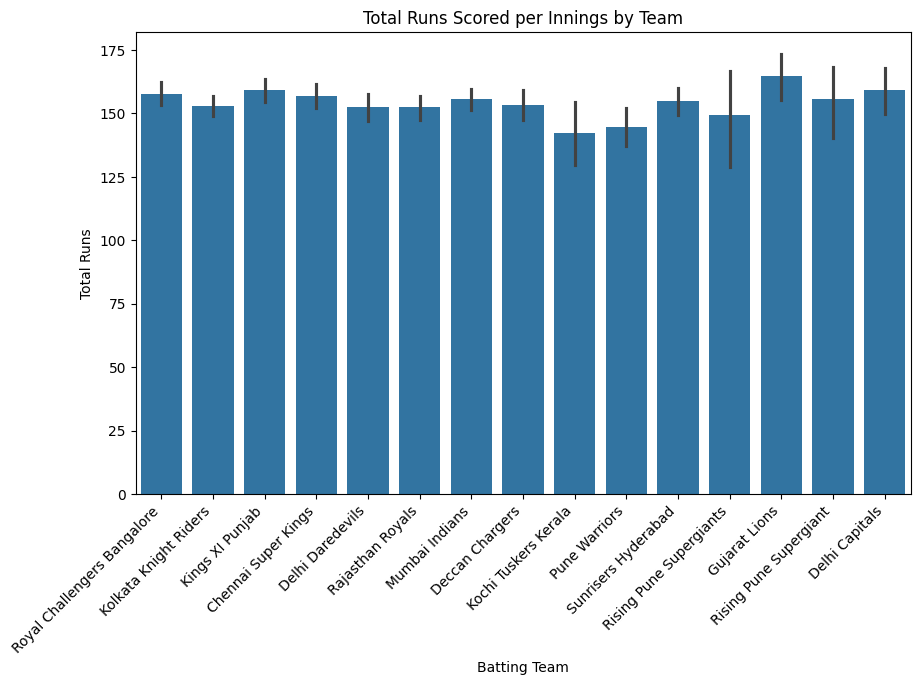

In [ ]:
# df1 contains ball-by-ball data and df2 contains match data
# preprocess as in the provided code.

# Group data by match ID and innings
innings_data = df1.groupby(['id', 'inning'])['total_runs'].sum().reset_index()

# Merge with match data to get team information
innings_data = pd.merge(innings_data, df2[['id', 'team1', 'team2', 'winner']], on='id', how='left')

# Function to determine the batting team
def get_batting_team(row):
    if row['inning'] == 1:
        return row['team1']
    elif row['inning'] == 2:
        return row['team2']
    else:
        return None  # Handle cases with more than 2 innings if needed

# Apply the function to get batting team for each innings
innings_data['batting_team'] = innings_data.apply(get_batting_team, axis=1)


# Now you can compare innings-wise performance
print(innings_data.head())

#Example comparison: Average runs scored per innings by each team
average_runs_per_innings = innings_data.groupby('batting_team')['total_runs'].mean()
print("\nAverage runs per innings:")
print(average_runs_per_innings)


#Further analysis and visualizations can be performed based on this data

# Example visualization:
plt.figure(figsize=(10, 6))
sns.barplot(x='batting_team', y='total_runs', data=innings_data)
plt.title('Total Runs Scored per Innings by Team')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.show()


# 16. Which team has scored the most number of 200+ scores?

In [ ]:
# Create a new column '200+' in innings_data to indicate scores above 200
innings_data['200+'] = innings_data['total_runs'] >= 200

# Group by batting team and sum the '200+' column to count 200+ scores for each team
team_200_plus_counts = innings_data.groupby('batting_team')['200+'].sum()

# Find the team with the most 200+ scores
team_with_most_200_plus = team_200_plus_counts.idxmax()
most_200_plus_scores = team_200_plus_counts.max()

print(f"The team with the most 200+ scores is {team_with_most_200_plus} with {most_200_plus_scores} scores.")

The team with the most 200+ scores is Royal Challengers Bangalore with 19 scores.


# 17. Which team has conceded 200+ scores the most?

In [ ]:
# Group by bowling team and sum the '200+' column to count 200+ scores conceded by each team
# Calculate the total runs conceded by each bowling team
team_runs_conceded = innings_data.groupby('batting_team')['total_runs'].sum()

# Filter for scores of 200 or more
team_200_plus_conceded = team_runs_conceded[team_runs_conceded >= 200]

# Find the team that conceded the most 200+ scores
team_with_most_200_plus_conceded = team_200_plus_conceded.idxmax()
most_200_plus_conceded = team_200_plus_conceded.max()

print(f"The team that has conceded the most 200+ scores is {team_with_most_200_plus_conceded} with {most_200_plus_conceded} runs conceded.")

The team that has conceded the most 200+ scores is Mumbai Indians with 31597 runs conceded.


# 18. What was the highest run scored by a team in a single match?

In [ ]:
# Find the highest total_runs scored in a single match
highest_score = innings_data['total_runs'].max()

print(f"The highest run scored by a team in a single match is: {highest_score}")

The highest run scored by a team in a single match is: 263


# **19. Which is the biggest win in terms of run margin?**

In [ ]:
# prompt: Which is the biggest win in terms of run margin?

# Assuming 'result_margin' in df2 represents the run margin
# and 'result' indicates 'runs' for run margin wins

# Filter for matches where the result is 'runs'
run_margin_wins = df2[df2['result'] == 'runs']

# Find the maximum run margin
biggest_win_margin = run_margin_wins['result_margin'].max()

# Get the details of the match with the biggest win margin
biggest_win_match = run_margin_wins[run_margin_wins['result_margin'] == biggest_win_margin]

print(f"The biggest win in terms of run margin is {biggest_win_margin} runs.")
print("Details of the match:")
biggest_win_match

The biggest win in terms of run margin is 146.0 runs.
Details of the match:


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,eliminator,method,umpire1,umpire2,season,year,toss_win_and_match_win,chasing_team_wins
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,...,runs,146.0,N,Normal,Nitin Menon,CK Nandan,2017,2017,False,False


# **20. Which batsmen have played the most number of balls?**

In [ ]:
# prompt: Which batsmen have played the most number of balls?

# Group by batsman and count the number of balls faced
balls_faced = df1.groupby('batsman')['ball'].count()

# Sort in descending order to find the batsmen who have played the most balls
most_balls_faced = balls_faced.sort_values(ascending=False)

# Print or display the result
most_balls_faced

,ball
batsman,
V Kohli,4609
S Dhawan,4208
RG Sharma,4088
SK Raina,4041
DA Warner,3819
...,...
S Kaushik,1
V Pratap Singh,1
JL Denly,1


# 21. Who are the leading run-scorers of all time?

In [ ]:
# prompt: Who are the leading run-scorers of all time?

# Group by batsman and sum the runs scored
batsman_runs = df1.groupby('batsman')['batsman_runs'].sum()

# Sort in descending order to find the leading run-scorers
leading_run_scorers = batsman_runs.sort_values(ascending=False)

# Print or display the result
leading_run_scorers

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
...,...
IC Pandey,0
S Kaushik,0
ND Doshi,0


# 22. Who has hit the most number of 4's?

In [ ]:
# prompt: Who has hit the most number of 4's?

# Group by batsman and count the number of 4's
fours_hit = df1[df1['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()

# Sort in descending order to find the batsman with the most 4's
most_fours = fours_hit.sort_values(ascending=False)

# Print or display the result
most_fours

,batsman_runs
batsman,
S Dhawan,591
DA Warner,510
V Kohli,504
SK Raina,493
G Gambhir,492
...,...
DM Bravo,1
M Muralitharan,1
J Theron,1


# 23. Who has hit the most number of 6's?

In [ ]:
# prompt: Who has hit the most number of 6's?

# Group by batsman and count the number of 6's
sixes_hit = df1[df1['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()

# Sort in descending order to find the batsman with the most 6's
most_sixes = sixes_hit.sort_values(ascending=False)

# Print or display the result
most_sixes

,batsman_runs
batsman,
CH Gayle,349
AB de Villiers,235
MS Dhoni,216
RG Sharma,214
V Kohli,202
...,...
SN Thakur,1
JJ van der Wath,1
Basil Thampi,1


# 24. Who has the highest strike rate?

In [ ]:
# prompt: Who has the highest strike rate?

# Calculate the strike rate for each batsman
# Strike rate is calculated as (total runs / total balls faced) * 100
batsman_strike_rate = (df1.groupby('batsman')['batsman_runs'].sum() / df1.groupby('batsman')['ball'].count()) * 100

# Find the batsman with the highest strike rate
highest_strike_rate_batsman = batsman_strike_rate.idxmax()
highest_strike_rate = batsman_strike_rate.max()

print(f"Batsman with highest strike rate: {highest_strike_rate_batsman}")
print(f"Highest strike rate: {highest_strike_rate:.2f}")

Batsman with highest strike rate: B Stanlake
Highest strike rate: 250.00


# 25. Who is the leading wicket-taker?

In [ ]:
# prompt: Who is the leading wicket-taker?

# The provided code does not calculate the leading wicket-taker.
# You need to provide the relevant data and code to do this.
# Assuming 'df1' contains the necessary information (e.g., dismissals)

# Example (replace with your actual data and column names):
# Assuming 'df1' has a column 'dismissal_kind' and 'bowler'
wickets_taken = df1[df1['dismissal_kind'].notnull()].groupby('bowler')['dismissal_kind'].count()
leading_wicket_taker = wickets_taken.idxmax()
leading_wicket_count = wickets_taken.max()

print(f"Leading wicket-taker: {leading_wicket_taker} with {leading_wicket_count} wickets.")

Leading wicket-taker: Harbhajan Singh with 3451 wickets.


# 26. Which stadium has hosted the most number of matches?

In [ ]:
# prompt: Which stadium has hosted the most number of matches?

# Assuming 'df2' is your DataFrame with match data and a 'venue' column
venue_counts = df2['venue'].value_counts()
most_matches_venue = venue_counts.idxmax()
most_matches_count = venue_counts.max()

print(f"The stadium that has hosted the most matches is {most_matches_venue} with {most_matches_count} matches.")

The stadium that has hosted the most matches is Eden Gardens with 77 matches.


# 27. Who has won the most MOM awards?

In [ ]:
# prompt: Who has won the most MOM awards?

# Assuming 'df2' is your DataFrame with match data and a 'player_of_match' column
mom_awards = df2['player_of_match'].value_counts()
most_mom_awards_player = mom_awards.idxmax()
most_mom_awards_count = mom_awards.max()

print(f"The player with the most Man of the Match awards is {most_mom_awards_player} with {most_mom_awards_count} awards.")

The player with the most Man of the Match awards is AB de Villiers with 23 awards.


# 28. What is the count of fours hit in each season?

In [ ]:
# prompt: What is the count of fours hit in each season?

# Assuming df1 contains ball-by-ball data and df2 contains match data
# and that both dataframes are already loaded and preprocessed.

# Add a 'season' column to df1 based on the match date
df1['season'] = df1['id'].map(df2.set_index('id')['season'])

# Group by season and count fours
fours_per_season = df1[df1['batsman_runs'] == 4].groupby('season')['batsman_runs'].count()

fours_per_season

,batsman_runs
season,
2008,1703
2009,1317
2010,1708
2011,1916
2012,1911
2013,2052
2014,1562
2015,1607
2016,1633


# 29. What is the count of sixes hit in each season?

In [ ]:
# prompt: What is the count of sixes hit in each season?

# Assuming df1 contains ball-by-ball data and df2 contains match data
# and that both dataframes are already loaded and preprocessed.

# Add a 'season' column to df1 based on the match date
df1['season'] = df1['id'].map(df2.set_index('id')['season'])

# Group by season and count sixes
sixes_per_season = df1[df1['batsman_runs'] == 6].groupby('season')['batsman_runs'].count()

sixes_per_season

,batsman_runs
season,
2008,623
2009,506
2010,585
2011,639
2012,733
2013,675
2014,714
2015,692
2016,639


# 30. What is the count of runs scored from boundaries in each season?

In [ ]:
# prompt: What is the count of runs scored from boundaries in each season?

# Assuming df1 contains ball-by-ball data and df2 contains match data
# and that both dataframes are already loaded and preprocessed.

# Add a 'season' column to df1 based on the match date
df1['season'] = df1['id'].map(df2.set_index('id')['season'])

# Calculate boundary runs (4s and 6s)
boundary_runs_per_season = df1[df1['batsman_runs'].isin([4, 6])].groupby('season')['batsman_runs'].sum()

boundary_runs_per_season

,batsman_runs
season,
2008,10550
2009,8304
2010,10342
2011,11498
2012,12042
2013,12258
2014,10532
2015,10580
2016,10366


# 31. What is the run contribution from boundaries in each season?

In [ ]:
# prompt: What is the run contribution from boundaries in each season?

# Assuming df1 contains ball-by-ball data and df2 contains match data
# and that both dataframes are already loaded and preprocessed.

# Add a 'season' column to df1 based on the match date
df1['season'] = df1['id'].map(df2.set_index('id')['season'])

# Calculate the total runs scored in each season
total_runs_per_season = df1.groupby('season')['total_runs'].sum()

# Calculate boundary runs (4s and 6s)
boundary_runs_per_season = df1[df1['batsman_runs'].isin([4, 6])].groupby('season')['batsman_runs'].sum()

# Calculate the contribution of boundaries to the total runs
boundary_contribution_percentage = (boundary_runs_per_season / total_runs_per_season) * 100

boundary_contribution_percentage

,0
season,
2008,58.816971
2009,50.882353
2010,54.826910
2011,54.353787
2012,53.632031
2013,54.380906
2014,55.698345
2015,57.713288
2016,54.957057


# **32. Which team has scored the most runs in the first 6 overs?**

In [ ]:
# prompt: Which team has scored the most runs in the first 6 overs?

# Assuming df1 contains ball-by-ball data and df2 contains match data
# and that both dataframes are already loaded and preprocessed.

# Add a 'season' column to df1 based on the match ID
df1['season'] = df1['id'].map(df2.set_index('id')['season'])

# Filter for the first 6 overs of each match
first_six_overs = df1[df1['over'] <= 6]

# Group by match ID, batting team, and sum the runs
runs_in_first_six = first_six_overs.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()

# Merge with match data to get team names
runs_in_first_six = pd.merge(runs_in_first_six, df2[['id', 'team1', 'team2']], on='id', how='left')

# Function to get the batting team name
def get_batting_team_name(row):
    if row['batting_team'] == row['team1']:
        return row['team1']
    elif row['batting_team'] == row['team2']:
        return row['team2']
    else:
        return None

runs_in_first_six['batting_team_name'] = runs_in_first_six.apply(get_batting_team_name, axis=1)

# Group by batting team and sum runs
team_runs_first_six = runs_in_first_six.groupby('batting_team_name')['total_runs'].sum()


# Find the team with the most runs in the first six overs
team_most_runs_first_six = team_runs_first_six.idxmax()
most_runs_first_six = team_runs_first_six.max()

print(f"The team with the most runs in the first 6 overs is {team_most_runs_first_six} with {most_runs_first_six} runs.")

The team with the most runs in the first 6 overs is Mumbai Indians with 10475 runs.


# **33. Which team has scored the most runs in the last 4 overs?**

In [ ]:
# prompt: Which team has scored the most runs in the last 4 overs?

# Assuming df1 contains ball-by-ball data and df2 contains match data
# and that both dataframes are already loaded and preprocessed.

# Add a 'season' column to df1 based on the match ID
df1['season'] = df1['id'].map(df2.set_index('id')['season'])

# Filter for the last 4 overs of each match
last_four_overs = df1.groupby(['id', 'inning']).tail(4*6) # Assumes 6 balls per over

# Group by match ID, batting team, and sum the runs
runs_in_last_four = last_four_overs.groupby(['id', 'batting_team'])['total_runs'].sum().reset_index()

# Merge with match data to get team names
runs_in_last_four = pd.merge(runs_in_last_four, df2[['id', 'team1', 'team2']], on='id', how='left')

# Function to get the batting team name
def get_batting_team_name(row):
    if row['batting_team'] == row['team1']:
        return row['team1']
    elif row['batting_team'] == row['team2']:
        return row['team2']
    else:
        return None

runs_in_last_four['batting_team_name'] = runs_in_last_four.apply(get_batting_team_name, axis=1)

# Group by batting team and sum runs
team_runs_last_four = runs_in_last_four.groupby('batting_team_name')['total_runs'].sum()

# Find the team with the most runs in the last four overs
team_most_runs_last_four = team_runs_last_four.idxmax()
most_runs_last_four = team_runs_last_four.max()

print(f"The team with the most runs in the last 4 overs is {team_most_runs_last_four} with {most_runs_last_four} runs.")

The team with the most runs in the last 4 overs is Mumbai Indians with 7148 runs.


# **34. Which team has the best scoring run-rate in the first 6 overs?**

In [ ]:
# prompt: Which team has the best scoring run-rate in the first 6 overs?

# Assuming df1 contains ball-by-ball data and df2 contains match data
# and that both dataframes are already loaded and preprocessed.

# Add a 'season' column to df1 based on the match ID
df1['season'] = df1['id'].map(df2.set_index('id')['season'])

# Filter for the first 6 overs of each match
first_six_overs = df1[df1['over'] <= 6]

# Group by match ID, batting team, and calculate total runs and balls faced
runs_and_balls_first_six = first_six_overs.groupby(['id', 'batting_team']).agg({'total_runs': 'sum', 'ball': 'count'}).reset_index()

# Calculate the run rate
runs_and_balls_first_six['run_rate'] = (runs_and_balls_first_six['total_runs'] / (runs_and_balls_first_six['ball'] / 6))

# Merge with match data to get team names
runs_and_balls_first_six = pd.merge(runs_and_balls_first_six, df2[['id', 'team1', 'team2']], on='id', how='left')

# Function to get the batting team name
def get_batting_team_name(row):
    if row['batting_team'] == row['team1']:
        return row['team1']
    elif row['batting_team'] == row['team2']:
        return row['team2']
    else:
        return None

runs_and_balls_first_six['batting_team_name'] = runs_and_balls_first_six.apply(get_batting_team_name, axis=1)

# Group by batting team and get the average run rate
team_avg_run_rate_first_six = runs_and_balls_first_six.groupby('batting_team_name')['run_rate'].mean()


# Find the team with the best average run rate in the first six overs
team_best_run_rate_first_six = team_avg_run_rate_first_six.idxmax()
best_run_rate_first_six = team_avg_run_rate_first_six.max()

print(f"The team with the best average run rate in the first 6 overs is {team_best_run_rate_first_six} with {best_run_rate_first_six:.2f}.")

The team with the best average run rate in the first 6 overs is Gujarat Lions with 8.31.


# **35. Which team has the best scoring run-rate in the last 4 overs?**

In [ ]:
# prompt: Which team has the best scoring run-rate in the last 4 overs?

# Assuming df1 contains ball-by-ball data and df2 contains match data
# and that both dataframes are already loaded and preprocessed.

# Add a 'season' column to df1 based on the match ID
df1['season'] = df1['id'].map(df2.set_index('id')['season'])

# Filter for the last 4 overs of each match
last_four_overs = df1.groupby(['id', 'inning']).tail(4*6) # Assumes 6 balls per over

# Group by match ID, batting team, and calculate total runs and balls faced
runs_and_balls_last_four = last_four_overs.groupby(['id', 'batting_team']).agg({'total_runs': 'sum', 'ball': 'count'}).reset_index()

# Calculate the run rate
runs_and_balls_last_four['run_rate'] = (runs_and_balls_last_four['total_runs'] / (runs_and_balls_last_four['ball'] / 6))

# Merge with match data to get team names
runs_and_balls_last_four = pd.merge(runs_and_balls_last_four, df2[['id', 'team1', 'team2']], on='id', how='left')

# Function to get the batting team name
def get_batting_team_name(row):
    if row['batting_team'] == row['team1']:
        return row['team1']
    elif row['batting_team'] == row['team2']:
        return row['team2']
    else:
        return None

runs_and_balls_last_four['batting_team_name'] = runs_and_balls_last_four.apply(get_batting_team_name, axis=1)

# Group by batting team and get the average run rate
team_avg_run_rate_last_four = runs_and_balls_last_four.groupby('batting_team_name')['run_rate'].mean()

# Find the team with the best average run rate in the last four overs
team_best_run_rate_last_four = team_avg_run_rate_last_four.idxmax()
best_run_rate_last_four = team_avg_run_rate_last_four.max()

print(f"The team with the best average run rate in the last 4 overs is {team_best_run_rate_last_four} with {best_run_rate_last_four:.2f}.")

The team with the best average run rate in the last 4 overs is Rising Pune Supergiants with 9.05.
